In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [5]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([7, 9, 4, ..., 4, 0, 3])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 0 6 ... 6 6 5] [7 9 4 ... 4 0 3]
0.10675609756097561
Iteration:  10
[0 0 6 ... 0 6 3] [7 9 4 ... 4 0 3]
0.19658536585365854
Iteration:  20
[5 0 6 ... 0 6 3] [7 9 4 ... 4 0 3]
0.2971951219512195
Iteration:  30
[5 0 6 ... 0 6 3] [7 9 4 ... 4 0 3]
0.40202439024390246
Iteration:  40
[5 0 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.48492682926829267
Iteration:  50
[5 0 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.5443902439024391
Iteration:  60
[7 0 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.5943414634146341
Iteration:  70
[7 0 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.6314634146341463
Iteration:  80
[7 0 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.6632439024390244
Iteration:  90
[7 4 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.6876585365853658
Iteration:  100
[7 4 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.7060731707317073
Iteration:  110
[7 4 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.7215365853658536
Iteration:  120
[7 4 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.7344146341463414
Iteration:  130
[7 4 6 ... 4 7 3] [7 9 4 ... 4 0 3]
0.7446341463414634
Iteration:  1

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [11]:
from matplotlib import pyplot as plt

Prediction:  [7]
Label:  7


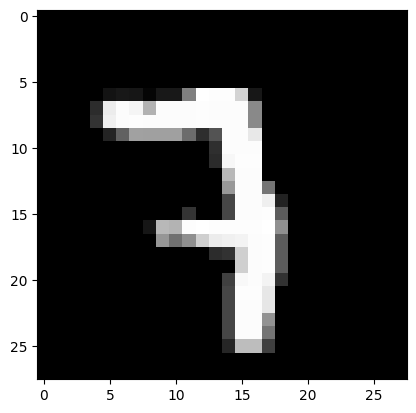

Prediction:  [4]
Label:  9


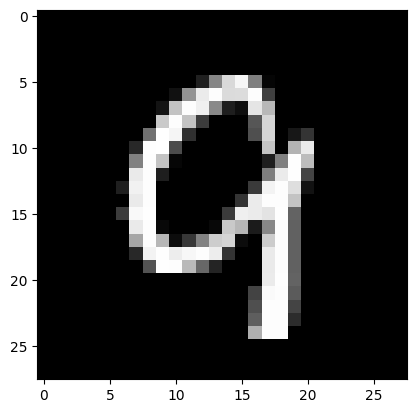

Prediction:  [4]
Label:  4


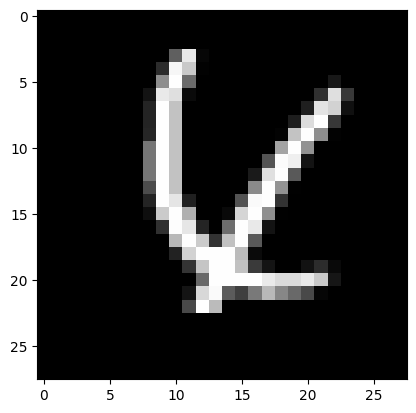

Prediction:  [0]
Label:  0


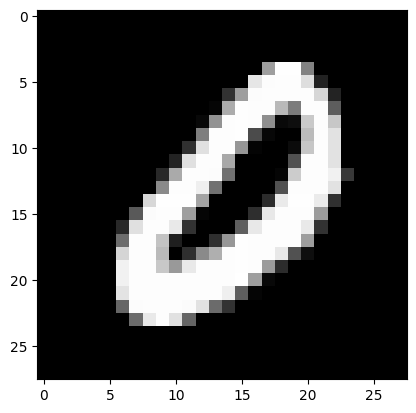

Prediction:  [5]
Label:  3


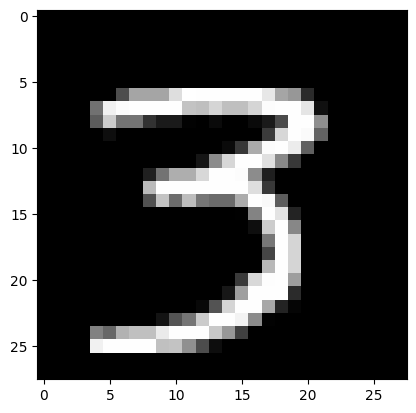

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)